In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

url = '194gRdV0X3KQVIAx4JUYGdOycHA35IZq0'
gdd.download_file_from_google_drive(file_id = url,dest_path='./data.zip',unzip=True)

Unzipping...

/usr/local/lib/python3.10/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "194gRdV0X3KQVIAx4JUYGdOycHA35IZq0" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


Before running the file Upload all your data set on your goole drive in a zip format

# New Section

In [ ]:
import json
import glob
import numpy as np
import cv2
import copy

video_files =  glob.glob('/content/drive/MyDrive/Model_deepfake/Dataset/*.mp4')

frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<150):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames [301, 300, 300, 300, 300, 301, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 301, 301, 301, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 300, 332, 321, 170, 233, 211, 300, 300, 300, 299, 300, 958, 971, 956, 973, 982, 969, 960, 971, 947, 1000, 957, 956, 1020, 946, 946, 1168, 210, 1489, 2083, 1387, 1105, 531, 567, 410, 434, 202, 300, 261, 292, 253, 234, 449, 191, 172, 199, 439, 389, 393, 451, 339, 283, 449, 423, 397, 253, 253]
Total number of videos:  106
Average frame per video: 455.5188679245283


In [ ]:
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image
!pip3 install face_recognition
!mkdir '/content/drive/MyDrive/Model_deepfake/Face_only_data'
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from tqdm.autonotebook import tqdm

def create_face_videos(path_list,out_dir):
  already_present_count =  glob.glob(out_dir+'*.mp4')
  print("No of videos already present " , len(already_present_count))
  for path in tqdm(path_list):
    out_path = os.path.join(out_dir,path.split('/')[-1])
    file_exists = glob.glob(out_path)
    if(len(file_exists) != 0):
      print("File Already exists: " , out_path)
      continue
    frames = []
    flag = 0
    face_all = []
    frames1 = []
    out = cv2.VideoWriter(out_path,cv2.VideoWriter_fourcc('M','J','P','G'), 30, (112,112))
    for idx,frame in enumerate(frame_extract(path)):

      if(idx <= 300):
        frames.append(frame)
        # if(len(frames) == 4):
        if(len(frames) == 2):
          faces = face_recognition.batch_face_locations(frames)
          for i,face in enumerate(faces):
            if(len(face) != 0):
              top,right,bottom,left = face[0]
            try:
              out.write(cv2.resize(frames[i][top:bottom,left:right,:],(112,112)))
            except:
              pass
          frames = []
    try:
      del top,right,bottom,left
    except:
      pass
    out.release()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=b676030deeb7a1ecf1a61852a1db26f5796048d61a684230ad0938fce66ace86
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
mkdir: cannot create directory ‘/content/drive/MyDrive/Model_deepfake/Face_only_data’: File exists


<ipython-input-4-01275eb85be5>:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


once enough///

In [ ]:
# create_face_videos(video_files,'/content/drive/MyDrive/Model_deepfake/Face_only_data')

In [ ]:
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

# torch.cuda.empty_cache()

def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames

def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('/content/drive/MyDrive/Model_deepfake/Face_only_data/*.mp4')

print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 101
['/content/drive/MyDrive/Model_deepfake/Face_only_data/agazcxsnes.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/aepuluzrdy.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/aehruoendm.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/ahsogiihuz.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/ahsabqozjt.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/atqtjhcjok.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/abgrdkbhch.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/aeplbqxnge.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/aahkgsltxw.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/aakkhbgnjp.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/abmdetdeok.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/fsdgpysupr.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_data/gdnbcgtfay.mp4', '/content/drive/MyDrive/Model_deepfake/Face_only_da

In [ ]:
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/content/drive/MyDrive/Model_deepfake/Face_only_data/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 143, 150, 150, 144, 143, 108, 150, 150, 150, 150, 150, 150, 150, 150, 142, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150]
Total no of video:  97
Average frame per video: 149.27835051546393


In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
    header_list = ["file", "label"]
    lab = pd.read_csv('/content/drive/MyDrive/Model_deepfake/dataset_detail.csv', names=header_list)
    fake = 0
    real = 0
    for i in data_list:
        temp_video = i.split('/')[-1]
        matching_rows = lab.loc[lab["file"] == temp_video]
        if not matching_rows.empty:
            label = matching_rows.iloc[0, 1]
            if label == 'FAKE':
                fake += 1
            if label == 'REAL':
                real += 1
        else:
            print(f"Warning: Video '{temp_video}' not found in CSV file.")
    return real, fake

In [ ]:
# #count the number of fake and real videos
# def number_of_real_and_fake_videos(data_list):
#     header_list = ["file", "label"]
#     lab = pd.read_csv('/content/drive/MyDrive/Model_deepfake/dataset_detail.csv', names=header_list)
#     fake = 0
#     real = 0
#     for i in data_list:
#         temp_video = i.split('/')[-1]
#         temp_video = temp_video.replace('.mp4', '')  # Remove '.mp4' extension
#         matching_rows = lab.loc[lab.iloc[:, 0] == temp_video]
#         if not matching_rows.empty:
#             label = matching_rows.iloc[0, 1]
#             if label == 'FAKE':
#                 fake += 1
#             if label == 'REAL':
#                 real += 1
#         else:
#             print(f"Warning: Video '{temp_video}' not found in CSV file.")
#     return real, fake

               file label
0    abarnvbtwb.mp4  REAL
1            02.mp4  REAL
2            05.mp4  REAL
3            06.mp4  REAL
4            10.mp4  REAL
..              ...   ...
105  fxszvpqldu.mp4  FAKE
106  gdnbcgtfay.mp4  FAKE
107  geszhvgoch.mp4  FAKE
108  gpvwsfexwp.mp4  FAKE
109  gyaxfbagnj.mp4  FAKE

[110 rows x 2 columns]
train :  79
test :  20
TRAIN:  Real: 39  Fake: 40
TEST:  Real: 11  Fake: 9


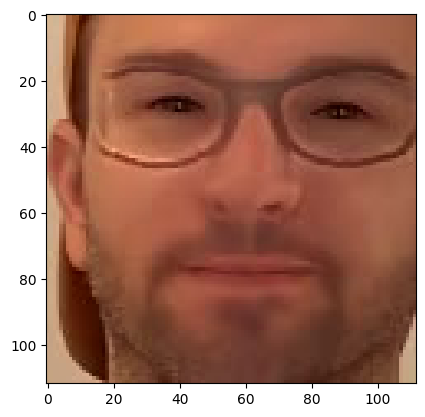

In [ ]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/MyDrive/Model_deepfake/dataset_detail.csv',names=header_list)
print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
# train_loader = DataLoader(train_data,batch_size = 128,shuffle = True,num_workers = 4)
# valid_loader = DataLoader(val_data,batch_size = 128,shuffle = True,num_workers = 4)
train_loader = DataLoader(train_data,batch_size = 32,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 32,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size, seq_length, 2048)
        x_lstm, _ = self.lstm(x, None)
        return fmap, self.dp(self.linear1(x_lstm[:, -1, :]))


In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# import torch
# from torch.autograd import Variable
# import time
# import os
# import sys
# import os
# def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
#     model.train()
#     losses = AverageMeter()
#     accuracies = AverageMeter()
#     t = []
#     for i, (inputs, targets) in enumerate(data_loader):
#         if torch.cuda.is_available():
#             targets = targets.type(torch.cuda.LongTensor)
#             inputs = inputs.cuda()
#         _,outputs = model(inputs)
#         loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
#         acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
#         losses.update(loss.item(), inputs.size(0))
#         accuracies.update(acc, inputs.size(0))
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         sys.stdout.write(
#                 "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
#                 % (
#                     epoch,
#                     num_epochs,
#                     i,
#                     len(data_loader),
#                     losses.avg,
#                     accuracies.avg))
#     torch.save(model.state_dict(),'/content/drive/MyDrive/Model_deepfake/Dataset/checkpoint.pt')
#     return losses.avg,accuracies.avg
# def test(epoch,model, data_loader ,criterion):
#     print('Testing')
#     model.eval()
#     losses = AverageMeter()
#     accuracies = AverageMeter()
#     pred = []
#     true = []
#     count = 0
#     with torch.no_grad():
#         for i, (inputs, targets) in enumerate(data_loader):
#             if torch.cuda.is_available():
#                 targets = targets.cuda().type(torch.cuda.FloatTensor)
#                 inputs = inputs.cuda()
#             _,outputs = model(inputs)
#             loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
#             acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
#             _,p = torch.max(outputs,1)
#             true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
#             pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
#             losses.update(loss.item(), inputs.size(0))
#             accuracies.update(acc, inputs.size(0))
#             sys.stdout.write(
#                     "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
#                     % (
#                         i,
#                         len(data_loader),
#                         losses.avg,
#                         accuracies.avg
#                         )
#                     )
#         print('\nAccuracy {}'.format(accuracies.avg))
#     return true,pred,losses.avg,accuracies.avg
# class AverageMeter(object):
#     """Computes and stores the average and current value"""
#     def __init__(self):
#         self.reset()
#     def reset(self):
#         self.val = 0
#         self.avg = 0
#         self.sum = 0
#         self.count = 0

#     def update(self, val, n=1):
#         self.val = val
#         self.sum += val * n
#         self.count += n
#         self.avg = self.sum / self.count
# def calculate_accuracy(outputs, targets):
#     batch_size = targets.size(0)

#     _, pred = outputs.topk(1, 1, True)
#     pred = pred.t()
#     correct = pred.eq(targets.view(1, -1))
#     n_correct_elems = correct.float().sum().item()
#     return 100* n_correct_elems / batch_size

In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/drive/MyDrive/Model_deepfake/Dataset/model6.h5')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

def print_confusion_matrix(true, pred, labels=None):
    """
    Prints the confusion matrix along with F1 score, precision, recall, and accuracy
    based on true and predicted labels.

    Parameters:
        true (array-like): True labels.
        pred (array-like): Predicted labels.
        labels (array-like, optional): List of label names for the classes.
                                      If not provided, unique classes from true labels will be used.
    """
    conf_matrix = confusion_matrix(true, pred, labels=labels)

    if labels is None:
        labels = np.unique(true)

    plt.figure(figsize=(len(labels) + 2, len(labels)))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    precision, recall, f1_score, _ = precision_recall_fscore_support(true, pred, labels=labels, average=None)
    accuracy = accuracy_score(true, pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)


[Epoch 1/100] [Batch 2 / 3] [Loss: 0.078973, Acc: 100.00%]Testing
[Batch 0 / 1]  [Loss: 2.948811, Acc: 70.00%]
Accuracy 70.0
[Epoch 2/100] [Batch 2 / 3] [Loss: 0.122858, Acc: 100.00%]Testing
[Batch 0 / 1]  [Loss: 3.833266, Acc: 65.00%]
Accuracy 65.0
[Epoch 3/100] [Batch 2 / 3] [Loss: 0.096518, Acc: 100.00%]Testing
[Batch 0 / 1]  [Loss: 4.602687, Acc: 55.00%]
Accuracy 55.0
[Epoch 4/100] [Batch 2 / 3] [Loss: 0.096526, Acc: 100.00%]Testing
[Batch 0 / 1]  [Loss: 3.721939, Acc: 55.00%]
Accuracy 55.0
[Epoch 5/100] [Batch 2 / 3] [Loss: 0.131632, Acc: 100.00%]Testing
[Batch 0 / 1]  [Loss: 2.537353, Acc: 65.00%]
Accuracy 65.0
[Epoch 6/100] [Batch 2 / 3] [Loss: 0.096517, Acc: 100.00%]Testing
[Batch 0 / 1]  [Loss: 1.684135, Acc: 70.00%]
Accuracy 70.0
[Epoch 7/100] [Batch 2 / 3] [Loss: 0.107198, Acc: 98.73%]Testing
[Batch 0 / 1]  [Loss: 1.658521, Acc: 60.00%]
Accuracy 60.0
[Epoch 8/100] [Batch 2 / 3] [Loss: 0.089644, Acc: 100.00%]Testing
[Batch 0 / 1]  [Loss: 3.767936, Acc: 55.00%]
Accuracy 55.0
[

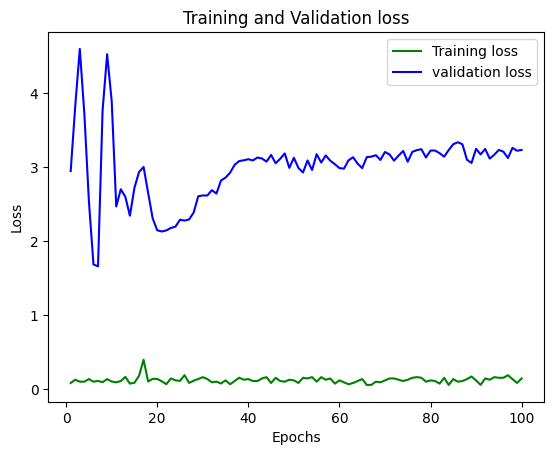

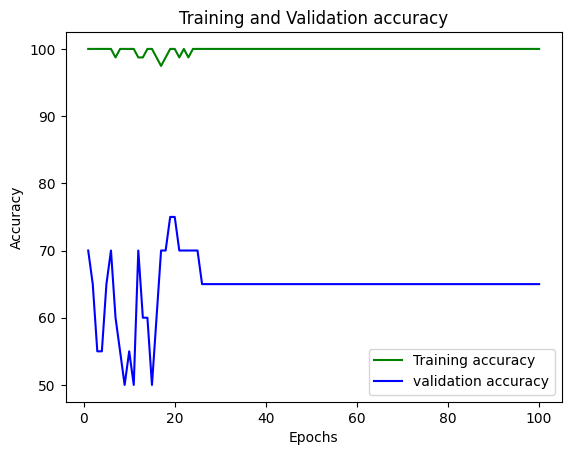

[[7 2]
 [5 6]]
Confusion Matrix:
[[7 2]
 [5 6]]

Visualization:


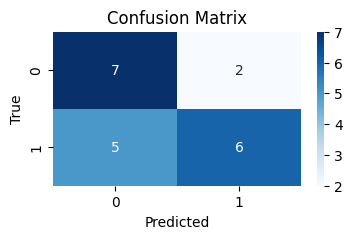

Precision: [0.58333333 0.75      ]
Recall: [0.77777778 0.54545455]
F1 Score: [0.66666667 0.63157895]
Accuracy: 0.65


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-4
#0.0005 try
#number of epochs
num_epochs = 100

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
# print_confusion_matrix(true,pred)
print("Confusion Matrix:")
print(confusion_matrix(true, pred))
print("\nVisualization:")
print_confusion_matrix(true, pred)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(true, pred))
print("\nVisualization:")
print_confusion_matrix(true, pred)

In [ ]:
tp, fp, fn, tn = confusion_matrix(true, pred).ravel()
print(tn)
print(fn)
print(tp)
print(fp)
specificity = (tn / (tn+fp))*100
recall = (tp/(tp+fn))*100
accuracy = ((tp+tn)/(tn+fp+fn+tp))*100
precision = (tp/(tp+fp))*100
F1 = (2*(precision*recall)/(precision + recall))
print('Accuracy:', f'{accuracy:.2f}%')
# print('Specificity:', f'{specificity:.2f}%')
print('Recall:',f'{recall:.2f}%')
print('F1:',f'{F1:.2f}%')
print('Precision:', f'{precision:.2f}%')

7
4
9
0
Accuracy: 80.00%
Recall: 69.23%
F1: 81.82%
Precision: 100.00%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
pred = model.predict(x_test)
pred_digits = np.argmax(pred, axis=1)
Y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(Y_true, pred_digits)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
 linecolor = "gray",fmt = ".2f",ax=ax)
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(Y_true, pred_digits).ravel()
specificity = (tn / (tn+fp))*100
recall = (tp/(tp+fn))*100
accuracy = ((tp+tn)/(tn+fp+fn+tp))*100
precision = (tp/(tp+fp))*100
print('Accuracy:', f'{accuracy:.2f}%')
print('Specificity:', f'{specificity:.2f}%')
print('Sensitivity:',f'{recall:.2f}%')
print('Precision:', f'{precision:.2f}%')

AttributeError: ignored

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
def plot_roc_curve(true, scores, pos_label=1):
    """
    Plots the ROC curve based on true labels and predicted scores/probabilities.

    Parameters:
        true (array-like): True labels.
        scores (array-like): Predicted scores or probabilities for the positive class.
        pos_label (int or str): The class to be considered as the positive class (default: 1).
    """
    fpr, tpr, _ = roc_curve(true, scores, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
plot_roc_curve(true, pred)

In [ ]:
#import libraries
!pip3 install face_recognition

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

In [ ]:
#import libraries
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
from torch import nn
from torchvision import models

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):

    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True)
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(x_lstm[:,-1,:]))


In [ ]:
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
sm = nn.Softmax()
inv_normalize =  transforms.Normalize(mean=-1*np.divide(mean,std),std=np.divide([1,1,1],std))
def im_convert(tensor):
    """ Display a tensor as an image. """
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)
    cv2.imwrite('./2.png',image*255)
    return image

def predict(model,img,path = './'):
  fmap,logits = model(img.to('cuda'))
  params = list(model.parameters())
  weight_softmax = model.linear1.weight.detach().cpu().numpy()
  logits = sm(logits)
  _,prediction = torch.max(logits,1)
  confidence = logits[:,int(prediction.item())].item()*100
  print('confidence of prediction:',logits[:,int(prediction.item())].item()*100)
  idx = np.argmax(logits.detach().cpu().numpy())
  bz, nc, h, w = fmap.shape
  out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h*w)).T,weight_softmax[idx,:].T)
  predict = out.reshape(h,w)
  predict = predict - np.min(predict)
  predict_img = predict / np.max(predict)
  predict_img = np.uint8(255*predict_img)
  out = cv2.resize(predict_img, (im_size,im_size))
  heatmap = cv2.applyColorMap(out, cv2.COLORMAP_JET)
  img = im_convert(img[:,-1,:,:,:])
  result = heatmap * 0.5 + img*0.8*255
  cv2.imwrite('/content/1.png',result)
  result1 = heatmap * 0.5/255 + img*0.8
  r,g,b = cv2.split(result1)
  result1 = cv2.merge((r,g,b))
  plt.imshow(result1)
  plt.show()
  return [int(prediction.item()),confidence]
#img = train_data[100][0].unsqueeze(0)
#predict(model,img)

In [ ]:
#!pip3 install face_recognition
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        for i,frame in enumerate(self.frame_extract(video_path)):
            #if(i % a == first_frame):
            faces = face_recognition.face_locations(frame)
            try:
              top,right,bottom,left = faces[0]
              frame = frame[top:bottom,left:right,:]
            except:
              pass
            frames.append(self.transform(frame))
            if(len(frames) == self.count):
              break
        #print("no of frames",len(frames))
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#Code for making prediction
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

path_to_videos= ["/content/drive/MyDrive/Model_deepfake/test_dataset/apgjqzkoma.mp4"]

video_dataset = validation_dataset(path_to_videos,sequence_length = 20,transform = train_transforms)
model = Model(2).cuda()
path_to_model = "/content/drive/MyDrive/Model_deepfake/Dataset/model1.h5"
model.load_state_dict(torch.load(path_to_model))
model.eval()
for i in range(0,len(path_to_videos)):
  print(path_to_videos[i])
  prediction = predict(model,video_dataset[i],'./')
  if prediction[0] == 0:
    print("REAL")
  else:
    print("FAKE")

In [ ]:
# torch.save(model.state_dict(), '/content/drive/MyDrive/Model_deepfake/Model_h5/model1.h5')

In [ ]:
!pip install opencv-python

In [ ]:
import torch
from torch import nn
from torchvision import models, transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import face_recognition

# Define the validation_dataset class
class ValidationDataset(torch.utils.data.Dataset):
    def __init__(self, video_paths, sequence_length=60, transform=None):
        self.video_paths = video_paths
        self.sequence_length = sequence_length
        self.transform = transform

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, index):
        video_path = self.video_paths[index]
        frames = []
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        step_size = frame_count // self.sequence_length

        for i in range(0, frame_count, step_size):
            cap.set(cv2.CAP_PROP_POS_FRAMES, i)
            success, frame = cap.read()
            if success:
                faces = face_recognition.face_locations(frame)
                try:
                    top, right, bottom, left = faces[0]
                    frame = frame[top:bottom, left:right, :]
                except:
                    pass
                if self.transform:
                    frame = self.transform(frame)
                frames.append(frame)

        cap.release()

        frames = torch.stack(frames)
        return frames

# Define the predict function
def predict(model, video_dataset):
    model.eval()
    predictions = []
    confidences = []

    with torch.no_grad():
        for video in video_dataset:
            video = video.unsqueeze(0).cuda()
            fmap, logits = model(video)
            probabilities = nn.functional.softmax(logits, dim=1)
            confidence = torch.max(probabilities).item() * 100
            prediction = torch.argmax(probabilities).item()

            predictions.append(prediction)
            confidences.append(confidence)

    return predictions, confidences

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the path to the trained model
model_path = "/content/drive/MyDrive/Model_deepfake/Dataset/model5.h5"

# # Set the paths to the deepfake videos
# video_paths = [

#     "/content/drive/MyDrive/Model_deepfake/test_dataset/1080.mp4",
#     "/content/drive/MyDrive/Model_deepfake/test_dataset/apgjqzkoma.mp4"


# ]

# Set the image size and normalization parameters
image_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define the data transforms
data_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# # Create the video dataset
# video_dataset = ValidationDataset(video_paths, sequence_length=100, transform=data_transforms)

# Load the trained model
model = Model(2).to(device)
model.load_state_dict(torch.load(model_path))
model = model.eval()

# Perform the predictions
predictions, confidences = predict(model, video_dataset)

# Print the predictions and confidences
for i in range(len(video_paths)):
    video_path = video_paths[i]
    prediction = predictions[i]
    confidence = confidences[i]

    print(f"Video: {video_path}")
    print(f"Prediction: {'FAKE' if prediction == 1 else 'REAL'}")
    print(f"Confidence: {confidence:.2f}%")
    print()


In [ ]:
video_paths = [

    "/content/drive/MyDrive/Model_deepfake/Dataset/02.mp4",
   "/content/drive/MyDrive/Model_deepfake/Dataset/03.mp4",
    "/content/drive/MyDrive/Model_deepfake/Dataset/aktnlyqpah.mp4",
    "/content/drive/MyDrive/Model_deepfake/Dataset/annsmfhdgk.mp4",
]

video_dataset = ValidationDataset(video_paths, sequence_length=60, transform=data_transforms)
predictions, confidences = predict(model, video_dataset)

for i in range(len(video_paths)):
    video_path = video_paths[i]
    prediction = predictions[i]
    confidence = confidences[i]

    print(f"Video: {video_path}")
    print(f"Prediction: {'FAKE' if prediction == 0 else 'REAL'}")
    print(f"Confidence: {confidence:.2f}%")
    print()

In [ ]:
# #Real
#     "/content/drive/MyDrive/Deepfake_if/test_Dataset/Real/10.mp4",
#     "/content/drive/MyDrive/Deepfake_if/test_Dataset/Real/02.mp4",
#     "/content/drive/MyDrive/Deepfake_if/test_Dataset/Real/adohdulfwb.mp4",
#     "/content/drive/MyDrive/Deepfake_if/test_Dataset/Real/aayfryxljh.mp4",
#     #Fake
#     "/content/drive/MyDrive/Deepfake_if/test_Dataset/fake/11.mp4",
#     "/content/drive/MyDrive/Deepfake_if/test_Dataset/fake/12.mp4",
#     "/content/drive/MyDrive/Deepfake_if/test_Dataset/fake/ahjnxtiamx.mp4",
#     "/content/drive/MyDrive/Deepfake_if/test_Dataset/fake/mxahsihabr.mp4"